## Dataset Introduction

The dataset included in this notebook was found in <https://www.kaggle.com/datasets/shivamb/netflix-shows>.

This dataset consists of listings of all the **movies** and **tv shows** available on **Netflix**, along with details such as - cast, directors, ratings, release year, duration, etc.
***
### Column Information


show_id: Unique ID for every Movie / Tv Show 

type: Identifier - A Movie or TV Show

title: Title of the Movie / Tv Show

director: Director of the Movie

cast: Actors involved in the movie / show

country: Country where the movie / show was produced

date_added: Date it was added on Netflix

release_year: Actual Release year of the move / show

rating: TV Rating of the movie / show

duration: Total Duration - in minutes or number of seasons

listed_in: Genere

description: The summary description

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8168,s8169,Movie,Terra,"Yann Arthus-Bertrand, Michael Pitiot",Vanessa Paradis,France,"May 1, 2016",2015,TV-PG,98 min,"Documentaries, International Movies",This visually arresting documentary essay refl...


In [6]:
df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3512,s3513,Movie,Sebastian Maniscalco: What's Wrong with People?,Manny Rodriguez,Sebastian Maniscalco,United States,"September 17, 2019",2012,TV-MA,76 min,Stand-Up Comedy,With his uproarious tirade on modern behavior ...


All values in these two samples are reasonable and informative. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
movies = df[df["type"]=="Movie"]

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.7+ KB


To study movie directors, first we need to separate all movies from this dataframe and create a new variable.

As seen in the dataframe information above, in columns "director", "cast", "country", "rating" and "duration", there are null values. 

In [10]:
movies = movies.reset_index()

<AxesSubplot:>

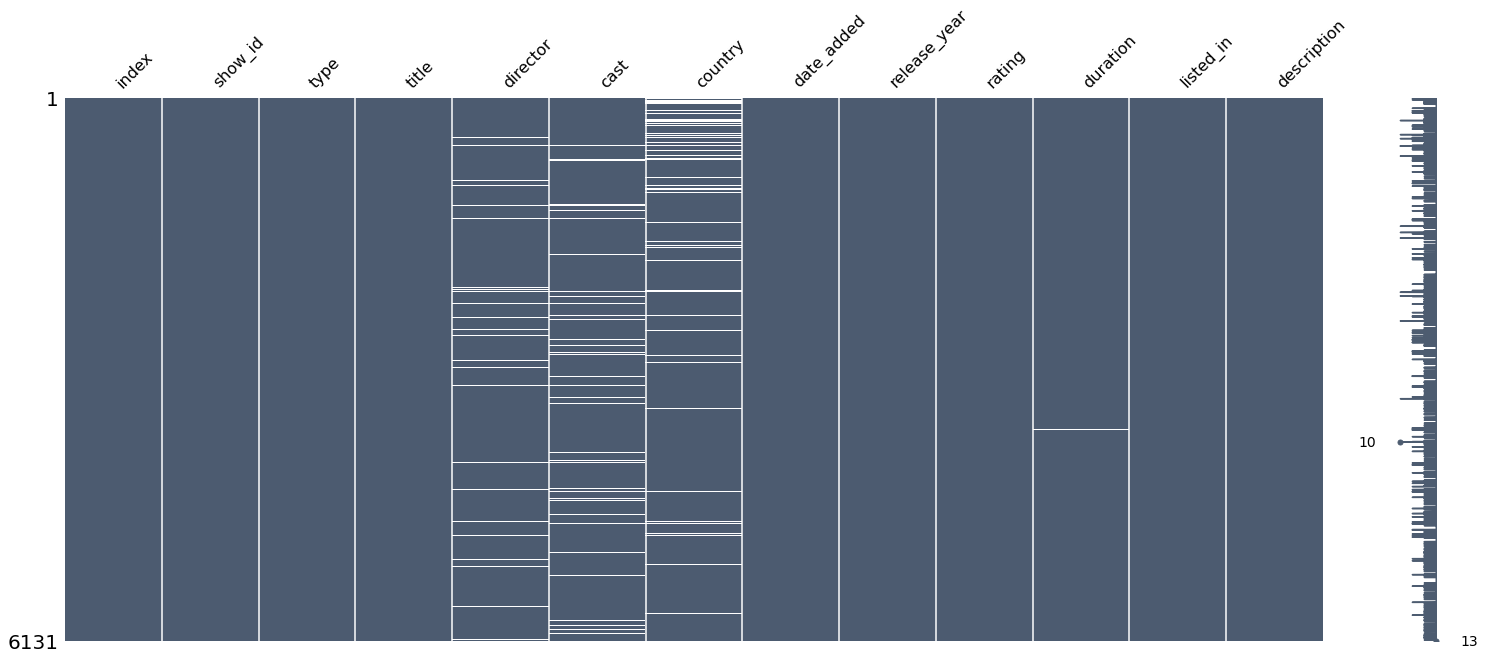

In [11]:
import missingno as msno
msno.matrix(movies,color=(0.3,0.36,0.44))

Visualizing null values in each column. 

In [12]:
movies.sample()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
590,917,s918,Movie,Framing John DeLorean,"Don Argott, Sheena M. Joyce","Alec Baldwin, Josh Charles, Morena Baccarin, D...",United States,"May 5, 2021",2019,TV-MA,109 min,"Documentaries, Dramas",From his rise in the auto industry to his fall...


In this sample I found show_id column is not useful for my analysis, so I deleted this column.

In [13]:
del movies["show_id"]

In [14]:
movies.sample()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4517,6777,Movie,For Grace,"Mark Helenowski, Kevin Pang",NaN,United States,"March 2, 2016",2015,TV-PG,92 min,Documentaries,As chef Curtis Duffy oversees every aspect of ...


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         6131 non-null   int64 
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(2), object(10)
memory usage: 574.9+ KB


In checking the type of data in each column, I found the data in column "duration" should be integer, which is more convenient for numerical calculations and comparisons. To ensure that all values in this column uses "min" as the unit, I checked the values through a bool expression. 

In [16]:
for i in range(6131):
    if type(movies["duration"].iloc[i]) != str:
        print(movies["duration"].iloc[i])
        print(i)

nan
nan
nan


These lines make sure that all values are string except three null values. 

In [17]:
bool_sum = []
for i in range(6131):
    if type(movies["duration"].iloc[i]) == str:
        bool_sum.append("min" in movies['duration'].iloc[i])
all(bool_sum)

True

These lines make sure that all non-null values in column "duration" are measured with minute. 

In [32]:
for i in range(6131):
    if type(movies["duration"].iloc[i]) == str:
        movies["duration"].iloc[i] =  re.sub(' min', '', movies["duration"].iloc[i])

/var/folders/4n/k93vbdf92yscjxqkrcqcsv1h0000gn/T/ipykernel_30246/3184316214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration"].iloc[i] =  re.sub(' min', '', movies["duration"].iloc[i])


In [33]:
movies.sample()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5967,8613,Movie,Train to Busan,Sang-ho Yeon,"Gong Yoo, Yu-mi Jung, Dong-seok Ma, Soo-an Kim...",South Korea,"March 18, 2017",2016,TV-MA,118,"Action & Adventure, Horror Movies, Internation...","As a zombie outbreak sweeps the country, a dad..."


In [34]:
movies['duration'] = pd.to_numeric(movies['duration'], errors = "raise")

Now we can calculate and compare the values in "duration" column.

In [35]:
pd.to_datetime(movies['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-23
          ...    
6126   2016-03-09
6127   2019-11-20
6128   2019-11-01
6129   2020-01-11
6130   2019-03-02
Name: date_added, Length: 6131, dtype: datetime64[ns]

Convert the values in "date_added" column into datetime data type.  

Besides, in the example above, I found there's Taiwan being independent from China in the "country" column, which indicates the name of this column is inappropriate, so I change that column name to "country_or_region".

In [36]:
movies = movies.rename(columns={"country":"country_or_region"})
movies.sample()

,index,type,title,director,cast,country_or_region,date_added,release_year,rating,duration,listed_in,description
1106,1694,Movie,Cloudy with a Chance of Meatballs 2,"Cody Cameron, Kris Pearn","Bill Hader, Anna Faris, James Caan, Will Forte...",United States,"November 15, 2020",2013,PG,95.0,"Children & Family Movies, Comedies",Inventor Flint Lockwood battles mutant food be...


Now it's time to make some plots with the figures in dataframe "movies".

<AxesSubplot:>

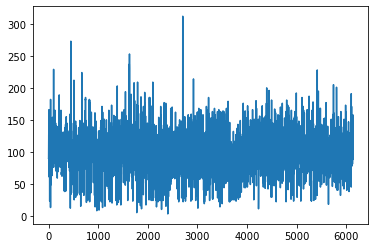

In [37]:
movies['duration'].plot()

<AxesSubplot:ylabel='Frequency'>

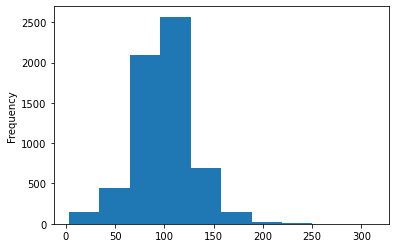

In [38]:
movies['duration'].plot(kind = 'hist')

<AxesSubplot:>

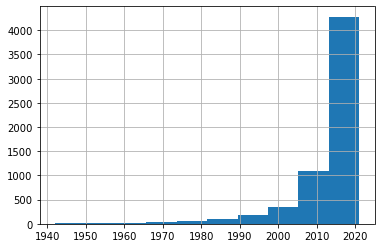

In [39]:
movies['release_year'].hist(xlabelsize = 10)

<AxesSubplot:xlabel='release_year', ylabel='duration'>

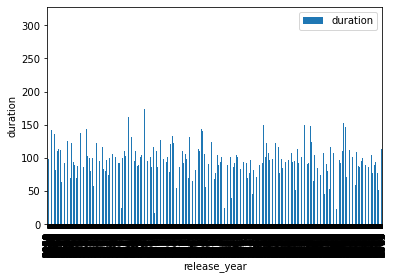

In [40]:
movies.plot(x='release_year', y='duration', kind='bar', xlabel="release_year", ylabel="duration")

To know how many movies are listed in category "Dramas", we need to first create a dataframe for dramas. 

In [41]:
drama_list = []
for i in range(6131):
    if "Dramas" in movies['listed_in'].iloc[i]:
        drama_list.append(i)
dramas = movies.iloc[drama_list]

In [61]:
dramas.reset_index()

,level_0,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,2,7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,3,9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,4,12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
3,15,30,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
4,16,35,Movie,The Father Who Moves Mountains,Daniel Sandu,"Adrian Titieni, Elena Purea, Judith State, Val...",NaN,"September 17, 2021",2021,TV-MA,110,"Dramas, International Movies, Thrillers",When his son goes missing during a snowy hike ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,6124,8798,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
2423,6125,8799,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120,"Dramas, International Movies",A change in the leadership of a political part...
2424,6126,8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
2425,6127,8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


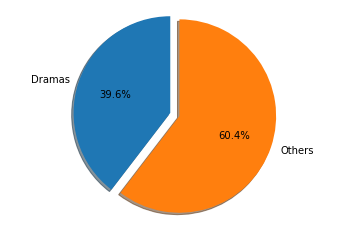

In [43]:
labels = 'Dramas', 'Others'
sizes = [2427,3704]
explode = (0.1,0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

Now apply the same method to know how many movies on Netflix are available in China

In [44]:
China_list = []
for i in range(6131):
    if "China" in movies['country_or_region'].astype(str).iloc[i]:
        China_list.append(i)
China = movies.iloc[China_list]

In [67]:
China.reset_index()

,level_0,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,18,38,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States","September 16, 2021",2017,PG-13,96,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
1,91,151,Movie,Initial D,"Andrew Lau Wai-keung, Alan Mak","Jay Chou, Anne Suzuki, Edison Chen, Anthony Wo...","China, Hong Kong","September 1, 2021",2005,TV-14,109,"Action & Adventure, International Movies","By day, an 18-year-old delivers tofu for his f..."
2,99,162,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118,Dramas,"This biopic of Thurgood Marshall, the first Bl..."
3,226,352,Movie,The Edge of Seventeen,Kelly Fremon Craig,"Hailee Steinfeld, Woody Harrelson, Kyra Sedgwi...","United States, China","August 1, 2021",2016,R,105,"Comedies, Dramas",A troubled teenager finds high school life eve...
4,364,573,Movie,Kung Fu Panda,"John Stevenson, Mark Osborne","Jack Black, Dustin Hoffman, Angelina Jolie, Ia...","United States, China","July 1, 2021",2008,PG,94,"Children & Family Movies, Comedies",When a powerful villain comes after peace in h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,5947,8584,Movie,Three,Johnnie To,"Louis Koo, Zhao Wei, Wallace Chung, Lam Suet, ...","Hong Kong, China","June 3, 2017",2016,TV-MA,88,"Action & Adventure, International Movies",A master criminal engineers his own shooting d...
110,5951,8589,Movie,Tik Tok,Li Jun,"Wallace Chung, Jung-jae Lee, Lang Yueting, Cha...",China,"July 1, 2017",2016,TV-14,108,"Dramas, International Movies, Thrillers",A police officer and a psychologist learn of a...
111,5970,8616,Movie,Transcendence,Wally Pfister,"Johnny Depp, Rebecca Hall, Morgan Freeman, Pau...","United Kingdom, China, United States","November 1, 2018",2014,PG-13,119,"Sci-Fi & Fantasy, Thrillers",Two computer scientists work to achieve techno...
112,6047,8702,Movie,Waterschool,Tiffanie Hsu,NaN,"United States, Brazil, India, Uganda, China","July 25, 2018",2018,TV-G,68,Documentaries,"Six young women, who each live near one of Ear..."


While some of these movies are only available in Hong Kong, not the mainland China. 

In [45]:
Hong_Kong_list = []
for i in range(6131):
    if "Hong Kong" in movies['country_or_region'].astype(str).iloc[i] and "China" not in movies['country_or_region'].astype(str).iloc[i]:
        Hong_Kong_list.append(i)
Hong_Kong = movies.iloc[Hong_Kong_list]

In [71]:
Hong_Kong.reset_index()

,level_0,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,97,159,Movie,Love in a Puff,Pang Ho-cheung,"Miriam Chin Wah Yeung, Shawn Yue, Singh Hartih...",Hong Kong,"September 1, 2021",2010,TV-MA,103,"Comedies, Dramas, International Movies",When the Hong Kong government enacts a ban on ...
1,322,486,Movie,Ratchet and Clank,"Jericca Cleland, Kevin Munroe","Paul Giamatti, John Goodman, Bella Thorne, Ros...","Hong Kong, Canada, United States","July 9, 2021",2016,PG,94,"Children & Family Movies, Comedies, Sci-Fi & F...",Affable alien Ratchet longs to be a Galactic R...
2,1013,1549,Movie,The Professor and the Madman,Farhad Safinia,"Mel Gibson, Sean Penn, Natalie Dormer, Eddie M...","Ireland, France, Iceland, United States, Mexic...","December 15, 2020",2019,TV-14,125,"Dramas, Independent Movies",While working on the first Oxford English Dict...
3,1055,1620,Movie,Peppermint,Pierre Morel,"Jennifer Garner, John Ortiz, John Gallagher Jr...","Hong Kong, United States","December 1, 2020",2018,R,102,Action & Adventure,"After her family is murdered, a mild-mannered ..."
4,1346,2059,Movie,Adrift,Baltasar Kormákur,"Shailene Woodley, Sam Claflin, Jeffrey Thomas,...","Hong Kong, Iceland, United States","September 1, 2020",2018,PG-13,96,"Action & Adventure, Dramas, Romantic Movies",A young couple’s sailing adventure becomes a f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,5722,8306,Movie,The Flying Guillotine,Meng Hua Ho,"Kuan Tai Chen, Feng Ku, Hung Wei, Wu Chi Liu, ...",Hong Kong,"July 28, 2018",1975,TV-MA,101,"Action & Adventure, Dramas, International Movies","In Qing-dynasty China, the emperor commands th..."
59,5805,8409,Movie,The Mad Monk,Johnny To,"Stephen Chow, Maggie Cheung, Anthony Wong Chau...",Hong Kong,"August 16, 2018",1993,TV-14,85,"Comedies, International Movies, Sci-Fi & Fantasy","To avoid punishment for his misdeeds, an arrog..."
60,5934,8569,Movie,The Young Vagabond,Sze Yu Lau,"Chia-Hui Liu, Wong Yu, Jason Pai Piao, Lung We...",Hong Kong,"August 16, 2018",1985,TV-14,85,"Action & Adventure, Comedies, International Mo...","To avenge his master, a wine-loving young man ..."
61,6055,8711,Movie,Weeds on Fire,Chi Fat Chan,"Liu Kai Chi, Lam Yiu-sing, Tony Tsz-Tung Wu, P...",Hong Kong,"September 27, 2018",2016,TV-MA,95,"Dramas, Independent Movies, International Movies","In 1980s Hong Kong, a school principal forms a..."


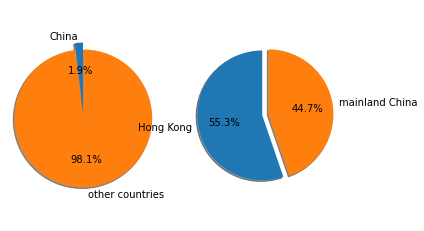

In [59]:
label1 = 'China', 'other countries'
label2 = 'Hong Kong', 'mainland China'
size1 = [114, 6017]
size2 = [63, 51]
explode = (0.1,0)  

fig, axs = plt.subplots(1, 2)
axs[0].pie(size1, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].pie(size2, explode=explode, labels=label2, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')
axs[1].axis('equal')
plt.show()

Then let's see how many films of Steven Spielberg are included in this dataset. 

In [63]:
Steven = []
for i in range(6131):
    if "Steven Spielberg" in movies['director'].astype(str).iloc[i]:
        Steven.append(i)
Stevens = movies.iloc[Steven]

In [66]:
Stevens.reset_index()

,level_0,index,type,title,director,cast,country_or_region,date_added,release_year,rating,duration,listed_in,description
0,19,41,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124.0,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
1,206,329,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142.0,Dramas,An FBI agent makes it his mission to put cunni...
2,796,1203,Movie,The BFG,Steven Spielberg,"Mark Rylance, Ruby Barnhill, Penelope Wilton, ...","United States, India, United Kingdom","March 15, 2021",2016,PG,118.0,"Children & Family Movies, Dramas",A little orphan meets up with a kind giant who...
3,4747,7070,Movie,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,"Harrison Ford, Cate Blanchett, Karen Allen, Ra...",United States,"January 1, 2019",2008,PG-13,123.0,"Action & Adventure, Children & Family Movies, ...",Indiana Jones is drawn into a Russian plot to ...
4,4748,7071,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, ...",United States,"January 1, 2019",1989,PG-13,127.0,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ..."
5,4749,7072,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",United States,"January 1, 2019",1981,PG,116.0,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...
6,4750,7073,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,"January 1, 2019",1984,PG,119.0,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile..."
7,4932,7308,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...","United States, India","February 21, 2018",2012,PG-13,150.0,Dramas,Director Steven Spielberg takes on the towerin...
8,5434,7957,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195.0,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
9,5620,8184,Movie,The Adventures of Tintin,Steven Spielberg,"Jamie Bell, Andy Serkis, Daniel Craig, Nick Fr...","United States, New Zealand, United Kingdom","November 20, 2019",2011,PG,107.0,Children & Family Movies,This 3-D motion capture adapts Georges Remi's ...


Let's see when does his films release in a graph.

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

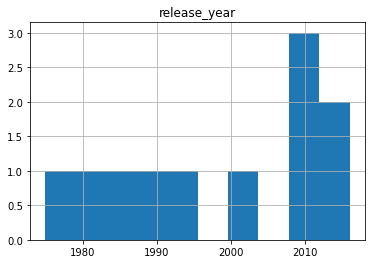

In [70]:
Stevens.hist("release_year")

***
## Comments
After finished all the processing and plotting processes, I found the need of further data pre-processing in the following aspects:
1. The null values in the dataframe

When I doing my data pre-processing, I found the processes such as converting the type of the data in a column and plotting have become much more complicated due to the null values. Therefore, to process the null values at the beginning is necessary, such as filling some meaningful values in the blanks, such values that defined to represent the vacancy in the documentation. Otherwise, to delete these rows with null values so as to make each of the rest values in the dataframe valid. 

2. Text-based analysis

Since this dataframe contains a lot of text-based information, such as the description, directors and actors. I used iterations to visit each text-based values. However, I believe with some basic knowledge about natural language processing(Nlp), I can process these values more effectively and realize more complicated manipulations upon the data. 

## Questions for Further Investigation
1. According to the number of TV shows and movies released in recent years, analyze which kind of media gains more popularity. 
2. How does the number of movies in each rating changes over decades? Are there more R movies recently than before?
3. Gain some insight about directors and their preferences for actors and movie types. 